# ADB Technical Profficiency Test - ADO Data Scientist - Magnata, Paolo

* gdp_pc - GDP Per Capita
* yrsch - years of schooling

In [1]:
import pandas as pd
import os 

In [38]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
path=r'E:\Downloads\ERMR'
file1=r'GDP_per_capita.csv'
file2=r'Years_of_schooling.csv'

In [3]:
GDP=pd.read_csv(os.path.join(path, file1))
EDUC=pd.read_csv(os.path.join(path, file2))

In [9]:
GDP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1062 entries, 0 to 1061
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   country      1062 non-null   object
 1   countrycode  1062 non-null   object
 2   year         1062 non-null   int64 
 3   gdp_pc       1062 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 33.3+ KB


# GDP EDA
- country codes and country names are unique and matches are the sames
- check how many observations there are for each country-country code pair

In [4]:
GDP.head()

,country,countrycode,year,gdp_pc
0,Albania,ALB,2002,7922
1,Albania,ALB,2003,9633
2,Albania,ALB,2004,11497
3,Albania,ALB,2005,12481
4,Albania,ALB,2006,14703


In [8]:
GDP.describe()

,year,gdp_pc
count,1062.000000,1.062000e+03
mean,2006.000000,3.060566e+05
std,2.583205,1.034506e+06
min,2002.000000,2.900000e+02
25%,2004.000000,8.990000e+03
50%,2006.000000,3.511150e+04
75%,2008.000000,1.816198e+05
max,2010.000000,1.300000e+07


In [70]:
# No null obesrvations

In [69]:
GDP.isna().sum()

country        0
countrycode    0
year           0
gdp_pc         0
dtype: int64

In [11]:
len(GDP['country'].unique())

118

In [12]:
len(GDP['countrycode'].unique())

118

In [23]:
GDP_check1=pd.DataFrame(GDP[['country','countrycode']].value_counts()).reset_index().rename(columns=({0:'obs_count'}))
GDP_check1

,country,countrycode,obs_count
0,Albania,ALB,9
1,Namibia,NAM,9
2,Portugal,PRT,9
3,Poland,POL,9
4,Philippines,PHL,9
...,...,...,...
113,Fiji,FJI,9
114,El Salvador,SLV,9
115,Egypt,EGY,9
116,Ecuador,ECU,9


In [26]:
GDP_check1.describe()

,obs_count
count,118.0
mean,9.0
std,0.0
min,9.0
25%,9.0
50%,9.0
75%,9.0
max,9.0


In [27]:
GDP_check1['obs_count'].value_counts()

9    118
Name: obs_count, dtype: int64

In [28]:
GDP.head()

,country,countrycode,year,gdp_pc
0,Albania,ALB,2002,7922
1,Albania,ALB,2003,9633
2,Albania,ALB,2004,11497
3,Albania,ALB,2005,12481
4,Albania,ALB,2006,14703


In [51]:
GDP_check2=pd.DataFrame(GDP.groupby(['country','countrycode'])['gdp_pc'].agg(['min','max','median','mean'])).reset_index()
GDP_check2

,country,countrycode,min,max,median,mean
0,Albania,ALB,7922,23572,12481.0,1.377967e+04
1,Argentina,ARG,70191,553621,153918.0,2.392130e+05
2,Australia,AUS,210741,807484,412095.0,4.599781e+05
3,Austria,AUT,87624,293236,162518.0,1.800044e+05
4,Bahrain,BHR,3549,37399,7347.0,1.224756e+04
5,Bangladesh,BGD,68666,255822,134837.0,1.411276e+05
6,Barbados,BRB,2376,6399,3800.0,4.093111e+03
7,Belgium,BEL,113597,349178,206009.0,2.195861e+05
8,Belize,BLZ,322,2065,944.0,1.027667e+03
9,Benin,BEN,3544,14039,6060.0,7.223444e+03


In [ ]:
#Observations within the dataset

In [53]:
GDP_check2[GDP_check2['min']==min(GDP_check2['min'])]

,country,countrycode,min,max,median,mean
65,Maldives,MDV,290,4691,1383.0,1690.444444


In [54]:
GDP_check2[GDP_check2['max']==max(GDP_check2['max'])]

,country,countrycode,min,max,median,mean
112,United States,USA,4200000,13000000,7900000.0,8400000.0


# Education EDA

In [61]:
EDUC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      118 non-null    object 
 1   countrycode  118 non-null    object 
 2   yrsch2002    118 non-null    float64
 3   yrsch2003    118 non-null    float64
 4   yrsch2004    118 non-null    float64
 5   yrsch2005    118 non-null    float64
 6   yrsch2006    118 non-null    float64
 7   yrsch2007    118 non-null    float64
 8   yrsch2008    118 non-null    float64
 9   yrsch2009    118 non-null    float64
 10  yrsch2010    118 non-null    float64
dtypes: float64(9), object(2)
memory usage: 10.3+ KB


In [62]:
# No null observations

In [60]:
EDUC.isna().sum()

country        0
countrycode    0
yrsch2002      0
yrsch2003      0
yrsch2004      0
yrsch2005      0
yrsch2006      0
yrsch2007      0
yrsch2008      0
yrsch2009      0
yrsch2010      0
dtype: int64

In [5]:
EDUC.head()

,country,countrycode,yrsch2002,yrsch2003,yrsch2004,yrsch2005,yrsch2006,yrsch2007,yrsch2008,yrsch2009,yrsch2010
0,Albania,ALB,4.63,5.77,6.95,7.93,8.61,8.54,9.93,10.24,10.44
1,Argentina,ARG,6.48,7.03,7.51,8.09,8.67,8.91,9.08,9.57,9.71
2,Australia,AUS,10.11,10.80,11.40,11.43,11.44,11.51,11.37,11.71,11.69
3,Austria,AUT,7.26,7.44,7.60,7.84,8.26,8.93,9.43,9.89,10.13
4,Bahrain,BHR,3.12,4.14,5.04,5.79,6.73,7.31,7.81,7.43,7.10


In [29]:
EDUC.describe()

,yrsch2002,yrsch2003,yrsch2004,yrsch2005,yrsch2006,yrsch2007,yrsch2008,yrsch2009,yrsch2010
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000
mean,4.335593,4.879576,5.461780,5.996864,6.534153,7.035678,7.486949,7.997458,8.477288
std,2.656006,2.745103,2.777353,2.735212,2.791741,2.850706,2.878382,2.894785,2.856466
min,0.310000,0.460000,0.650000,0.830000,0.950000,0.980000,1.130000,1.340000,1.950000
25%,2.147500,2.637500,3.260000,3.950000,4.532500,4.920000,5.327500,6.030000,6.367500
50%,4.005000,4.475000,5.195000,5.770000,6.565000,6.960000,7.545000,8.100000,8.645000
75%,6.450000,7.027500,7.510000,7.990000,8.702500,9.347500,9.927500,10.547500,11.035000
max,11.170000,12.030000,12.280000,12.350000,12.550000,12.830000,13.100000,13.010000,13.240000


# converting the educ dataframe into a horizontal dataframe

In [83]:
EDUC.head()

,country,countrycode,yrsch2002,yrsch2003,yrsch2004,yrsch2005,yrsch2006,yrsch2007,yrsch2008,yrsch2009,yrsch2010
0,Albania,ALB,4.63,5.77,6.95,7.93,8.61,8.54,9.93,10.24,10.44
1,Argentina,ARG,6.48,7.03,7.51,8.09,8.67,8.91,9.08,9.57,9.71
2,Australia,AUS,10.11,10.80,11.40,11.43,11.44,11.51,11.37,11.71,11.69
3,Austria,AUT,7.26,7.44,7.60,7.84,8.26,8.93,9.43,9.89,10.13
4,Bahrain,BHR,3.12,4.14,5.04,5.79,6.73,7.31,7.81,7.43,7.10


In [110]:
EDUC_1=pd.melt(EDUC, id_vars=['country','countrycode'], var_name='year', value_name='yrsch',
               value_vars=['yrsch2002','yrsch2003','yrsch2004','yrsch2005','yrsch2006','yrsch2007','yrsch2008','yrsch2009','yrsch2010'])
EDUC_1['year']=EDUC_1['year'].str.replace('yrsch','')
EDUC_1['year']=EDUC_1['year'].astype('int64')
EDUC_1=EDUC_1.sort_values(['country','year']).reset_index(drop=True)

In [111]:
EDUC_1.head()

,country,countrycode,year,yrsch
0,Albania,ALB,2002,4.63
1,Albania,ALB,2003,5.77
2,Albania,ALB,2004,6.95
3,Albania,ALB,2005,7.93
4,Albania,ALB,2006,8.61


In [104]:
len(EDUC_1['country'].unique())

118

In [105]:
len(EDUC_1['countrycode'].unique())

118

In [106]:
EDUC_1[['country','countrycode']].value_counts()

country                                         countrycode
Albania                                         ALB            9
Namibia                                         NAM            9
Portugal                                        PRT            9
Poland                                          POL            9
Philippines                                     PHL            9
Peru                                            PER            9
Paraguay                                        PRY            9
Panama                                          PAN            9
Pakistan                                        PAK            9
Norway                                          NOR            9
Niger                                           NER            9
New Zealand                                     NZL            9
Netherlands                                     NLD            9
Nepal                                           NPL            9
Mozambique                    

# Merging the dataframes

In [116]:
GDP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1062 entries, 0 to 1061
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   country      1062 non-null   object
 1   countrycode  1062 non-null   object
 2   year         1062 non-null   int64 
 3   gdp_pc       1062 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 33.3+ KB


In [107]:
GDP.head()

,country,countrycode,year,gdp_pc
0,Albania,ALB,2002,7922
1,Albania,ALB,2003,9633
2,Albania,ALB,2004,11497
3,Albania,ALB,2005,12481
4,Albania,ALB,2006,14703


In [117]:
EDUC_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1062 entries, 0 to 1061
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      1062 non-null   object 
 1   countrycode  1062 non-null   object 
 2   year         1062 non-null   int64  
 3   yrsch        1062 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 33.3+ KB


In [112]:
EDUC_1.head()

,country,countrycode,year,yrsch
0,Albania,ALB,2002,4.63
1,Albania,ALB,2003,5.77
2,Albania,ALB,2004,6.95
3,Albania,ALB,2005,7.93
4,Albania,ALB,2006,8.61


# Observations:
- GDP and EDUC have 1062 observations each with 118 unique countries and data for 9 observations for yrsch and GDP per capita across time

In [118]:
GDP_EDUC=pd.merge(GDP,EDUC_1, on=['country', 'countrycode','year'], how='outer')
GDP_EDUC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1125 entries, 0 to 1124
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      1125 non-null   object 
 1   countrycode  1125 non-null   object 
 2   year         1125 non-null   int64  
 3   gdp_pc       1062 non-null   float64
 4   yrsch        1062 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 52.7+ KB


# Notes:
1. There are naming differences with the 7 countries:

* "China, People's Republic of"
* 'China: Hong Kong SAR'
* 'China: Macao SAR'
* 'Dominican Republic'
* 'United Republic of Tanzania: Mainland'
* 'United States',
* 'Viet Nam', 
* 'China',
* 'China, Hong Kong Special Administrative Region',
* 'China, Macao Special Administrative Region'
* 'Dominican Rep.',
* 'USA'
* 'United Republic of Tanzania'
* 'Vietnam'

In [127]:
len(issues1['country'].unique())

14

In [126]:
issues1=GDP_EDUC[(GDP_EDUC['gdp_pc'].isna()) | (GDP_EDUC['yrsch'].isna())]
issues1['country'].unique()

array(["China, People's Republic of", 'China: Hong Kong SAR',
       'China: Macao SAR', 'Dominican Republic',
       'United Republic of Tanzania: Mainland', 'United States',
       'Viet Nam', 'China',
       'China, Hong Kong Special Administrative Region',
       'China, Macao Special Administrative Region', 'Dominican Rep.',
       'USA', 'United Republic of Tanzania', 'Vietnam'], dtype=object)

In [137]:
# Fixing before proceeding

In [141]:
GDP['country']=GDP['country'].str.replace("China, People's Republic of", "China")
GDP['country']=GDP['country'].str.replace('China: Hong Kong SAR', 'China, Hong Kong Special Administrative Region')
GDP['country']=GDP['country'].str.replace('China: Macao SAR','China, Macao Special Administrative Region')
GDP['country']=GDP['country'].str.replace('Dominican Republic','Dominican Rep.')
GDP['country']=GDP['country'].str.replace('United Republic of Tanzania: Mainland','United Republic of Tanzania')
GDP['country']=GDP['country'].str.replace('United States','USA')
GDP['country']=GDP['country'].str.replace('Viet Nam', 'Vietnam')

In [ ]:
# not merging on country code as VIETNAM country code is different

In [146]:
GDP_EDUC1=pd.merge(GDP,EDUC_1, on=['country', 'year'], how='outer')
GDP_EDUC1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1062 entries, 0 to 1061
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        1062 non-null   object 
 1   countrycode_x  1062 non-null   object 
 2   year           1062 non-null   int64  
 3   gdp_pc         1062 non-null   int64  
 4   countrycode_y  1062 non-null   object 
 5   yrsch          1062 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 58.1+ KB


In [161]:
GDP_EDUC1.head()

,country,countrycode_x,year,gdp_pc,countrycode_y,yrsch
0,Albania,ALB,2002,7922,ALB,4.63
1,Albania,ALB,2003,9633,ALB,5.77
2,Albania,ALB,2004,11497,ALB,6.95
3,Albania,ALB,2005,12481,ALB,7.93
4,Albania,ALB,2006,14703,ALB,8.61


In [200]:
# Creating the Growth Rate for GDP Per Capita

In [215]:
groups=GDP_EDUC1.sort_values('year').groupby(['country'])
GDP_EDUC1['gdp_pc_perc']=(groups['gdp_pc'].pct_change().mul(100).round(2)
                    .where(groups['year'].diff()==1))
GDP_EDUC1.head()

,country,countrycode_x,year,gdp_pc,countrycode_y,yrsch,gdp_pc_perc
0,Albania,ALB,2002,7922,ALB,4.63,NaN
1,Albania,ALB,2003,9633,ALB,5.77,21.60
2,Albania,ALB,2004,11497,ALB,6.95,19.35
3,Albania,ALB,2005,12481,ALB,7.93,8.56
4,Albania,ALB,2006,14703,ALB,8.61,17.80


In [208]:
# looped graphs for 4 countries

In [209]:
GDP_COUNTRY_GRAPH=['Philippines','Thailand','Indonesia','India']

In [210]:
output_path='test'

In [213]:
GDP_EDUC1[GDP_EDUC1['country']=='Philippines']

,country,countrycode_x,year,gdp_pc,countrycode_y,yrsch,gdp_pc_perc
756,Philippines,PHL,2002,72979,PHL,4.83,NaN
757,Philippines,PHL,2003,102914,PHL,5.56,0.41
758,Philippines,PHL,2004,134363,PHL,6.26,0.31
759,Philippines,PHL,2005,133333,PHL,6.64,-0.01
760,Philippines,PHL,2006,206537,PHL,7.15,0.55
761,Philippines,PHL,2007,290955,PHL,7.59,0.41
762,Philippines,PHL,2008,292452,PHL,7.96,0.01
763,Philippines,PHL,2009,324595,PHL,8.27,0.11
764,Philippines,PHL,2010,3918320,PHL,8.65,11.07


# Observations
1. Philippines had a stagnant GDP Per Capita growth rate until 2010 where it experienced a spike of up to 1100% and can be considered as an outlier
2. Thailand and Indonesi experienced a striking drop in GDP Per Capita growth rate in 2008, which is consequentlyy when th 2008 financial crisis ocurred
3. India experienced a spike in its GDP Per Capita growth rate in 2006 and was able to subsequently experience higher growth  rates in 2009 and 2010 despite setbacks in 2007.

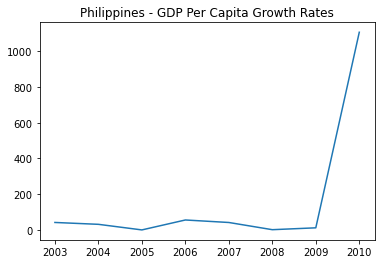

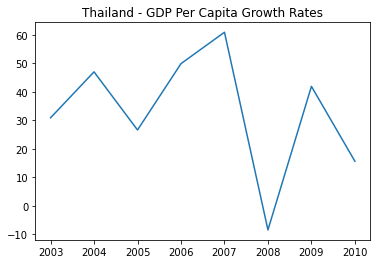

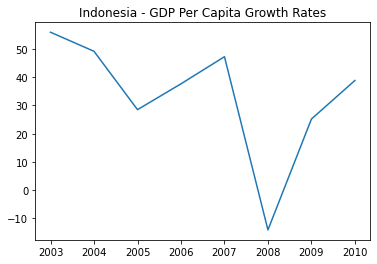

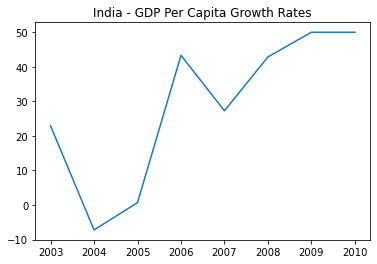

In [216]:
import matplotlib.pyplot as plt
for n in GDP_COUNTRY_GRAPH:
    df=GDP_EDUC1[GDP_EDUC1['country']==n]
    plt.plot('year', 'gdp_pc_perc', data=df)
    test = n  + ' - GDP Per Capita Growth Rates'
    plt.title(test)
    #plt.savefig(os.path.join(output_path,'GDP_PC_PERC',str(n)))
    plt.show()

In [217]:
# Scatterplot

In [218]:
GDP_EDUC1.head()

,country,countrycode_x,year,gdp_pc,countrycode_y,yrsch,gdp_pc_perc
0,Albania,ALB,2002,7922,ALB,4.63,NaN
1,Albania,ALB,2003,9633,ALB,5.77,21.60
2,Albania,ALB,2004,11497,ALB,6.95,19.35
3,Albania,ALB,2005,12481,ALB,7.93,8.56
4,Albania,ALB,2006,14703,ALB,8.61,17.80


In [234]:
import numpy as np
import seaborn as sns

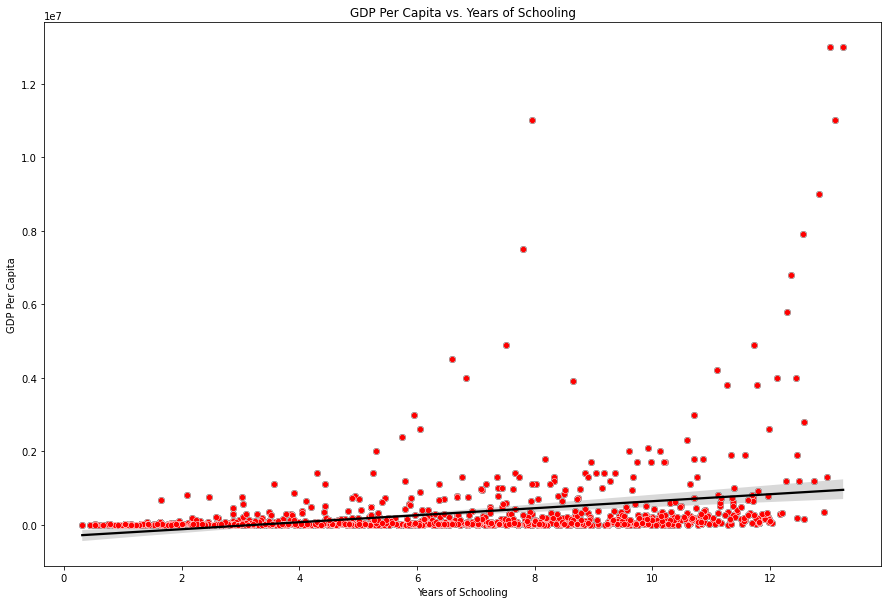

In [247]:
f = plt.figure(figsize=(15,10))
sns.regplot(y='gdp_pc', x='yrsch', data=GDP_EDUC1, color='black')
sns.scatterplot(y='gdp_pc', x='yrsch', data=GDP_EDUC1, color='red')
plt.xlabel('Years of Schooling')
plt.ylabel('GDP Per Capita')
plt.title('GDP Per Capita vs. Years of Schooling')
# plt.savefig(os.path.join('output_path','GDP_PC_vs_YRSCH.png'))
plt.show()

In [251]:
# summary table requirements

GDP_sum=pd.DataFrame(GDP_EDUC1.groupby(['country'])['gdp_pc'].agg(['count','min','max','median','mean'])).reset_index()
GDP_sum.head()

,country,count,min,max,median,mean
0,Albania,9,7922,23572,12481.0,13779.666667
1,Argentina,9,70191,553621,153918.0,239213.000000
2,Australia,9,210741,807484,412095.0,459978.111111
3,Austria,9,87624,293236,162518.0,180004.444444
4,Bahrain,9,3549,37399,7347.0,12247.555556


In [250]:
# summary table requirements

EDUC_sum=pd.DataFrame(GDP_EDUC1.groupby(['country'])['yrsch'].agg(['count','min','max','median','mean'])).reset_index()
EDUC_sum.head()

,country,count,min,max,median,mean
0,Albania,9,4.63,10.44,8.54,8.115556
1,Argentina,9,6.48,9.71,8.67,8.338889
2,Australia,9,10.11,11.71,11.43,11.273333
3,Austria,9,7.26,10.13,8.26,8.531111
4,Bahrain,9,3.12,7.81,6.73,6.052222


In [ ]:
# sorry didn't have enough time for the FE